<a href="https://colab.research.google.com/github/hamednasr/tensorflow/blob/main/02_ANN_tensorflow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import scipy.stats as stats
from sklearn.preprocessing import Normalizer

In [2]:
n_samples = 500
X, y = make_circles(n_samples, noise=.07,factor = .7)

In [3]:
X.shape

(500, 2)

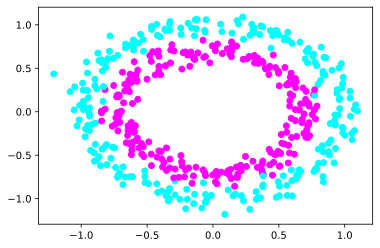

In [4]:
plt.scatter(X[:,0],X[:,1],c=y, cmap = 'cool')

In [5]:
y[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [45]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(64,activation='leaky_relu'),
                             tf.keras.layers.Dense(128,activation='leaky_relu'),
                             tf.keras.layers.Dense(128,activation='leaky_relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 10**(x/20))

history = model.fit(X_train,y_train,epochs=20,callbacks=[scheduler])

Epoch 1/20
15/15 [==============================] - 1s 2ms/step - loss: 0.6872 - accuracy: 0.4911 - lr: 0.0010
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.4956 - lr: 0.0011
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.4956 - lr: 0.0013
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.5644 - lr: 0.0014
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7800 - lr: 0.0016
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.9111 - lr: 0.0018
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9533 - lr: 0.0020
Epoch 8/20
15/15 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9644 - lr: 0.0022
Epoch 9/20
15/15 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9489 - lr: 0.0025
E

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                192       
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 25,153
Trainable params: 25,153
Non-trainable params: 0
_________________________________________________________________


In [47]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.687242,0.491111,0.001000
1,0.676971,0.495556,0.001122
2,0.661747,0.495556,0.001259
3,0.640951,0.564444,0.001413
4,0.571537,0.780000,0.001585
5,0.405646,0.911111,0.001778
6,0.207057,0.953333,0.001995
7,0.120420,0.964444,0.002239
8,0.126180,0.948889,0.002512
9,0.113121,0.942222,0.002818


In [48]:
list(results.columns)

['loss', 'accuracy', 'lr']

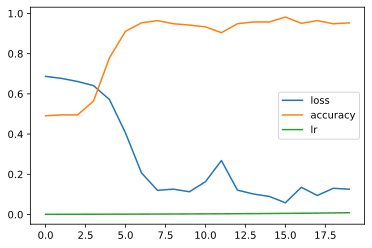

In [57]:
results = pd.DataFrame(history.history)
plt.figure()
plt.plot(results)
plt.legend(list(results.columns));

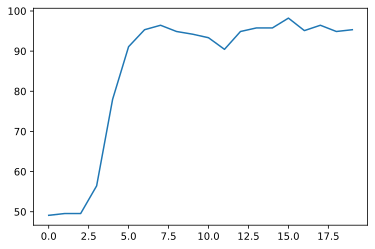

In [50]:
plt.plot(np.array(history.history['accuracy'])*100)

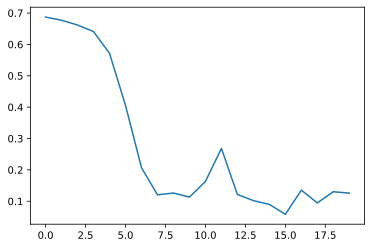

In [51]:
plt.plot(history.history['loss'])

In [52]:
model.evaluate(X_train,y_train)

15/15 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9689


[0.06439651548862457, 0.9688888788223267]

In [53]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0348 - accuracy: 1.0000


[0.03477973863482475, 1.0]

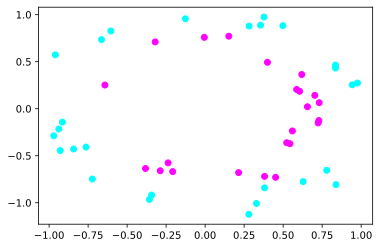

In [54]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test, cmap = 'cool')